# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [17]:
x = np.array([5, 15, 25, 35, 45, 55, 65, 75]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38, 60, 70])

# x = np.linspace(start = 1, stop=100, num=50)
# Y = np.linspace(start = 1, stop=100, num=50)


In [ ]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='USA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


## Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
pass_fra = np.array(Passengers_fra, dtype='int').reshape(-1, 1)
year_fra = np.array(Year_fra, dtype='int').reshape(-1, 1)
pass_usa = np.array(Passengers_usa, dtype='int').reshape(-1, 1)
year_usa = np.array(Year_usa, dtype='int').reshape(-1, 1)

In [6]:
lr = LinearRegression().fit(year_fra, pass_fra,)

r_sq = lr.score(year_fra, pass_fra)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {lr.intercept_}")

print(f"slope: {lr.coef_}")

y_pred = lr.predict(year_fra)
print(f"predicted response:\n{y_pred[:5]}")

coefficient of determination: 0.7987817361077296
intercept: [-2.23769636e+09]
slope: [[1140927.49304192]]
predicted response:
[[ 9930805.08127737]
 [11071732.57431936]
 [12212660.06736135]
 [13353587.56040335]
 [14494515.05344486]]


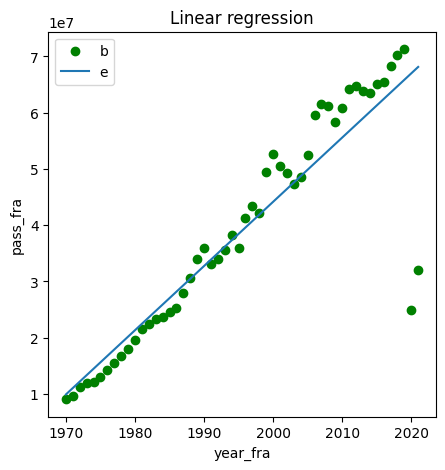

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(year_fra, pass_fra, label='raw data', color='g')
ax.plot(year_fra, y_pred, label='regression')
ax.set_xlabel('year_fra')
ax.set_ylabel('pass_fra')

ax.legend('best')
plt.title("Linear regression")
plt.savefig('example_LinearRegresion.png');

### With Sklearn (Simple)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

print(len(x))
print(x.min(), x.max())

52
1970 2021


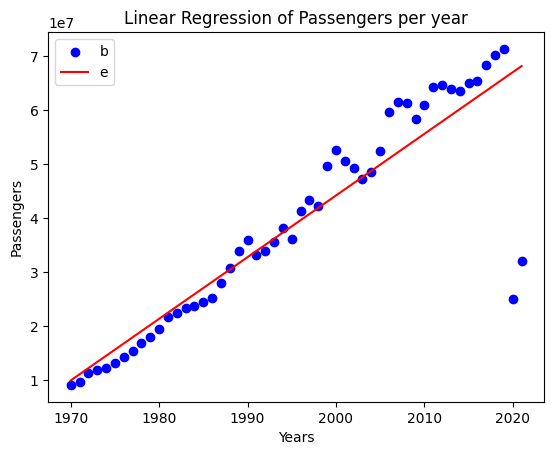

In [84]:
lr1 = LinearRegression()
 
lr1.fit(x, y)
coef = lr1.coef_
intercept = lr1.intercept_
y_pred = [(year * coef + intercept) for year in x]
y_pred = np.array(y_pred).reshape(-1, 1)

plt.scatter(x, y, color='blue', label='data points')
plt.plot(x, y_pred, color='red', label='regression')

plt.title('Linear Regression of Passengers per year')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();

### With Sklearn (standard)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

threshold = int(len(x)*0.8)
x_train = x[:threshold]
x_test = x[threshold:]
y_train = y[:threshold]
y_test = y[threshold:]


Mean squared error: 400574543736622.19
Coefficient of determination: -0.81


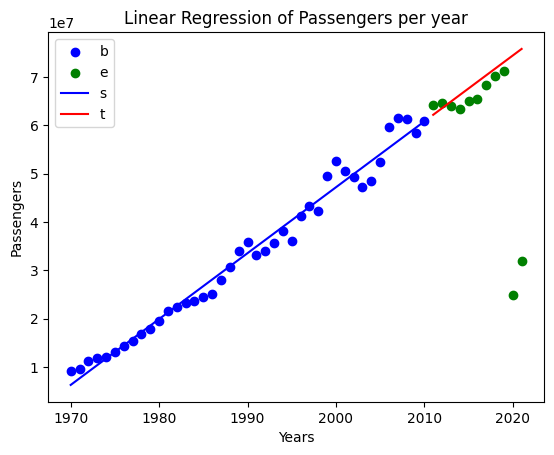

In [92]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

coef = lr2.coef_
intercept = lr2.intercept_
lr_train = [(year * coef + intercept) for year in x_train]
lr_train = np.array(lr_train).reshape(-1, 1)

plt.scatter(x_train, y_train, color='blue', label='train set')
plt.scatter(x_test, y_test, color='green', label='test set')
plt.plot(x_train, lr_train, color='blue', label='LR train')
plt.plot(x_test, y_pred, color='red', label='Prediction')

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


plt.title('Linear Regression of Passengers per year')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();

## Moving Average

In [8]:
pass_fra = np.array(Passengers_fra, dtype='int')
year_fra = np.array(Year_fra, dtype='int')
pass_usa = np.array(Passengers_usa, dtype='int')
year_usa = np.array(Year_usa, dtype='int')

In [19]:
def moving_avg_convolve(x, window_size):
    
    window = np.ones(int(window_size))/float(window_size)
    ma_vec = np.convolve(x, window, 'same')
    
    return ma_vec

def moving_avg_cumsum(x, window_size):
    
    cumsum = np.cumsum(np.insert(window_size, 0, 0))
    ma_vec = (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size) 
    
    return ma_vec

In [20]:
#mva = moving_avg_convolve(x=pass_fra, window_size=3)
mva = moving_avg_cumsum(x=pass_fra, window_size=3)

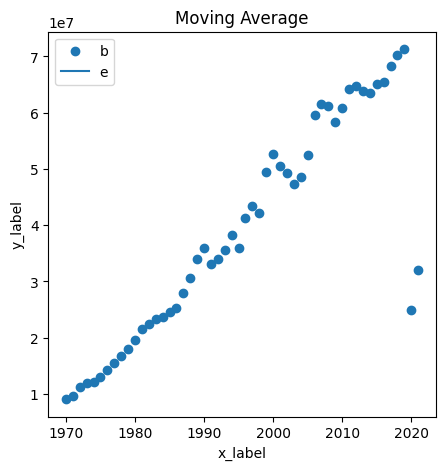

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(year_fra, pass_fra, label='raw data')
ax.plot(mva, label='moving average')
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')

ax.legend('best')
plt.title("Moving Average")
plt.savefig('example_MovingAverage.png');

## Polynomial Regression

### With numpy

In [96]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int')
y = np.array(Passengers_fra, dtype='int')

In [100]:
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
y_pred = [p(year) for year in x ]

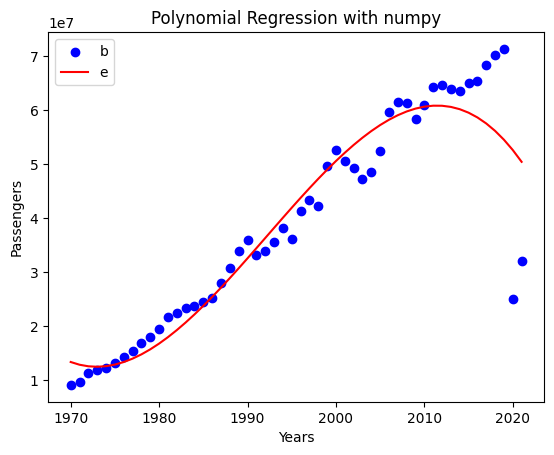

In [102]:
plt.scatter(x, y, color='blue', label='data points')
plt.plot(x, y_pred, color='red', label='regression')

plt.title('Polynomial Regression with numpy')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();

### With Sklearn

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [107]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

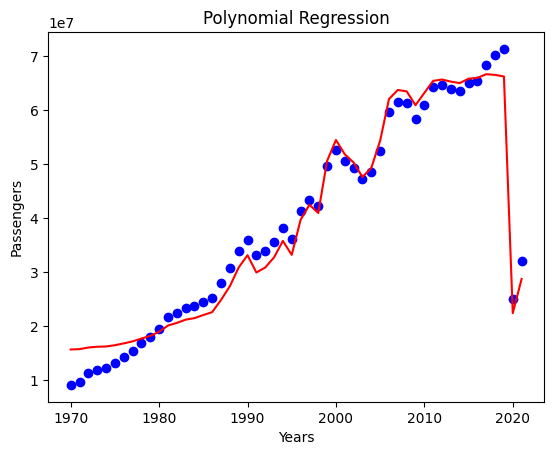

In [109]:
poly = PolynomialFeatures(degree=4)

y_poly = poly.fit_transform(y)

lin = LinearRegression()
lin.fit(y_poly, y)

# Visualization
plt.scatter(x, y, color='blue')
 
plt.plot(x, lin.predict(poly.fit_transform(y)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Years')
plt.ylabel('Passengers')
 
plt.show()

## Simple Exponential smoothing

### With statsmodels

In [145]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [121]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


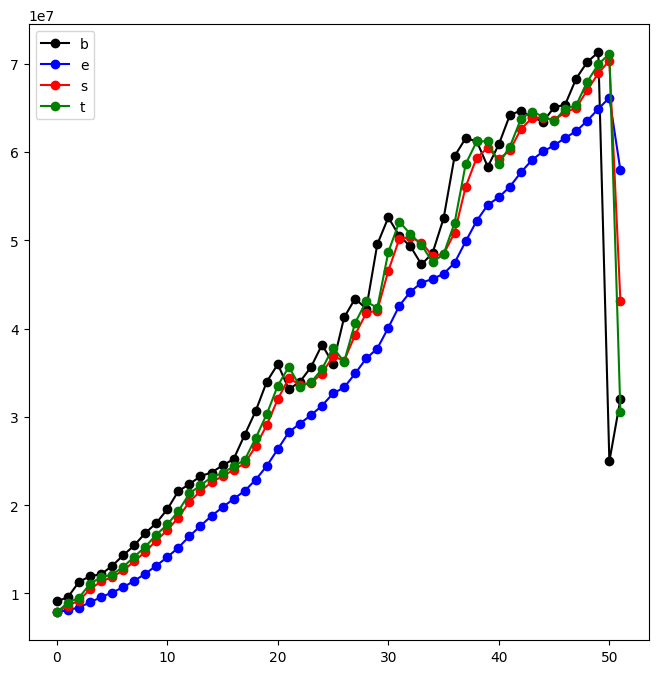

In [141]:
fit1 = SimpleExpSmoothing(y, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(y, initialization_method="heuristic").fit(smoothing_level=0.6, optimized=False)
fit3 = SimpleExpSmoothing(y, initialization_method="estimated").fit()

plt.figure(figsize=(8, 8))
plt.plot(y, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
plt.legend('best')

plt.show();

## Double exponential smoothing : Holt

### With statsmodels

In [144]:
from statsmodels.tsa.api import Holt

In [137]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


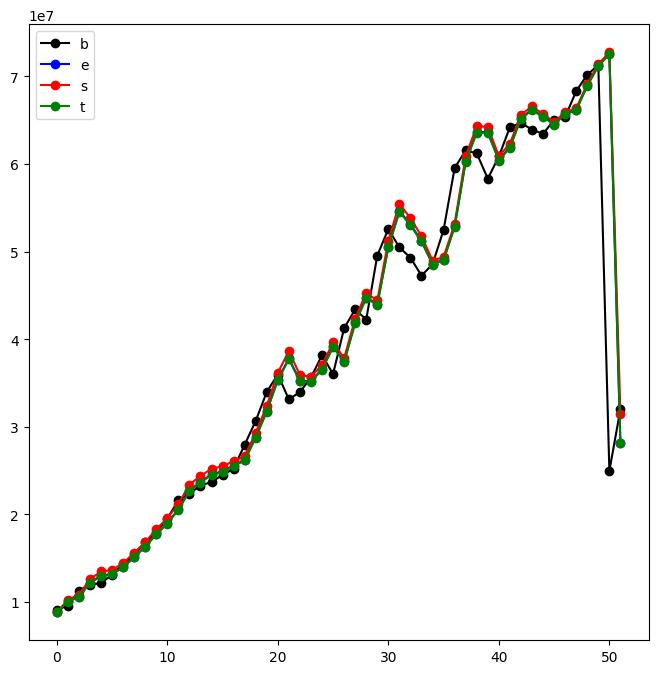

In [142]:
# Holt's linear trend
fit1 = Holt(y, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
# Exponential trend
fit2 = Holt(y, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
# Additive damped trend
fit3 = Holt(y, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)

plt.figure(figsize=(8, 8))
plt.plot(y, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
plt.legend('best')

plt.show();

## Triple exponential smoothing : Holt-Winter

### With statsmodels

In [146]:
from statsmodels.tsa.api import ExponentialSmoothing

In [147]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


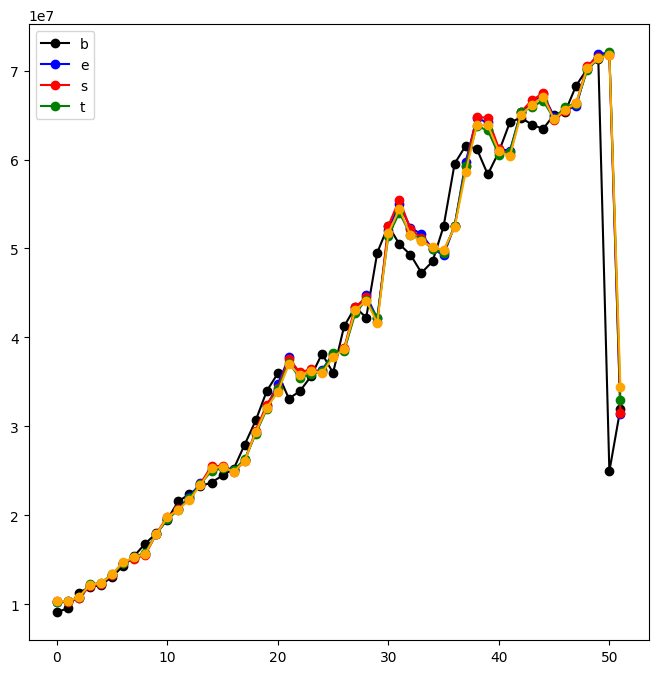

In [156]:
fit1 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="add",use_boxcox=True,initialization_method="estimated",).fit()
fit2 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="mul",use_boxcox=True,initialization_method="estimated",).fit()
fit3 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="add",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()
fit4 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="mul",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()

plt.figure(figsize=(8, 8))
plt.plot(y, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
plt.plot(fit4.fittedvalues, marker="o", color="orange")
plt.legend('best')

plt.show();

## Croston

In [ ]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)